<a href="https://colab.research.google.com/github/SebastianPre/ibio/blob/main/Laboratorio_9_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratorio 9: Predicción en series de tiempo**
**Facultad de ingeniería, departamento de Ingeniería Biomédica, Universidad de los Andes**\
**IBIO-2440 Programación científica**

**Nombres de los integrantes**


1.   Nombre integrante 1
2.   Nombre integrante 2

**Número del grupo**

*Escribir el número del grupo*

# **Contexto del problema**

El análisis cinemático en ciclismo se divide en dos metodología generales: una que se basa en una medición de ángulos de las articulaciones en un plano bidimensional y otra basa en un entorno tridimensional. El análisis bidimensional ofrece una información limitada debido a que solo es posible registrar álgulos de uno de los lados del cuerpo divido en el plago sagital, mientras que el tridimensional ofrece la posibilidad de registrar múltiples ángulos sobre todo el cuerpo. La limitación principal del segundo método es el costo asociado al uso de los equipos, el cual es drásticamente más elevado que el primero debido a que requiere un sistema de cámaras infrarojas ubicadas en un entorno de medición en 360 grados con un software especializado. Por otro lado, el método bidimensional solo requiere la grabación del sujeto con marcadores ubicados en principalmente en las articulaciones para ser procesada a través de paquetes de software que usualmente tienen licencias gratuitas para entornos académicos. Los ángulos medidos son como los que semuestran en la siguiente imagen:
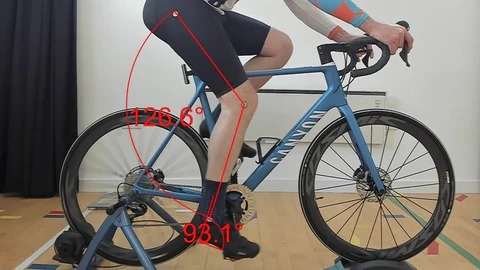 

La información de flexión de las articulaciones se  utiliza usualmente para determinar si el ajuste de la bicicleta al sujeto es adecuada o si, de acuerdo con desbalances u oscilaciones, es neceario reajustarla. Este ajuste se denomina en ciclismo como bikefitting, y es fundamental tanto para deportistas profesionales como para casuales en la reducción del riesgo de sufrir lesiones a corto y largo plazo. 


# **Descripción de la práctica**
En esta práctica se usarán los datos reales observados de los ángulos de flexión de la rodilla izquierda y la derecha de un sujeto en un estudio cinemático de ciclismo sobre una bicicleta estática. Estos datos fueron adquiridos usando un equipo de medición 3D durante 30 segundos en el laboratorio de movimiento del departamento de ingeniería biomédica de la Universidad de los Andes. Usando estos datos, se desea crear un modelo de regresión que permita predecir el comportamiento de la rodilla izquierda a partir de la observación del movimiento de la rodilla derecha. Este modelo permitirá hacer un análisis más extenso usando un equipo de medición 2D fuera del laboratorio de movimiento. En otras palabras, el objetivo de esta práctica es crear un modelo que, a partir de los datos de flexión de la rodilla derecha, pueda predecir el comportamiento de la rodilla izquierda. 

Sea $R(k)$ el ángulo de flexión para la rodilla derecha tomado en el instante de tiempo $k$, y sea $L(k)$ el ángulo de flexión de rodilla izquierda en el instante de tiempo $k$. La ecuación de diferencias que define la relación entre $R$ y $L$ se asume de la siguiente manera:

\begin{align*}
  L(k) = \beta_1R(k) +\beta_2R(k-1) + \beta_3R(k-2) + \cdots +  \beta_nR(k-n+1).
\end{align*}



Esta ecuación permite predecir el ángulo de flexión de la rodilla izquierda a partir de la historia de la rodilla derecha, donde $n$ es el tamaño de ventana. 

Para llevar a cabo todo el ejercicio de predición en series de tiempo, siga los siguientes pasos:

1. Lea y procese los datos en formato *xlsx* del documento "*train.xlsx*". Este contiene la lectura de los ángulos de flexión de las rodillas izquierda y derecha. Grafique la serie de tiempo del ángulo de flexión de las rodilla derecha y de la serie de tiempo del ángulo de flexión de la rodilla izquierda. Note que estas comienzan con un error de medición al inicio, asegurese de eliminar esta zona.

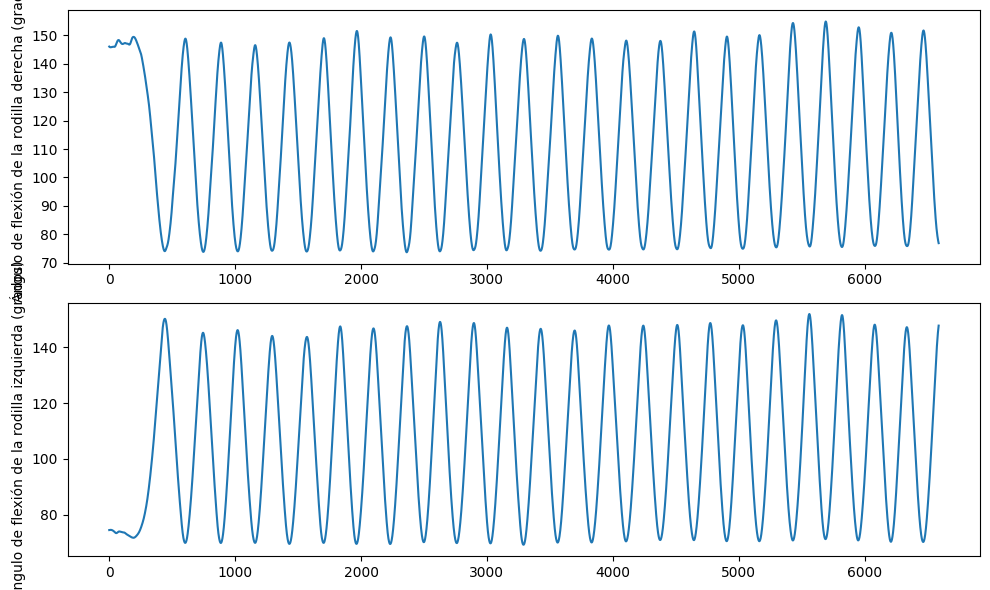

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("train.xlsx", skiprows=range(0, 10), header=None)

df.columns = ["R", "L"]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

ax1.plot(df["R"])
ax1.set_ylabel("Ángulo de flexión de la rodilla derecha (grados)")
ax2.plot(df["L"])
ax2.set_ylabel("Ángulo de flexión de la rodilla izquierda (grados)")
fig.tight_layout()
plt.show()


2. Diseñe una función que permita constuir la matriz $H$ y el vector $Y$ asociadas al problema de regresión planteado con un tamaño de ventana genérico $n$. Tenga en cuenta que la matriz $H$ utiliza la información de la rodilla derecha $R$ y el vector $Y$ utiliza la información de la rodilla izquierda $L$. Dicha función debe tener como entrada el set de datos y el tamaño de ventana $n$, y debe retornar el vector  $\beta^*=[\beta_1^*,\beta_2^*,\cdots,\beta_n^*]^T$ óptimo resolviendo el problema de mínimos cuadrados.

In [ ]:
import numpy as np

def regresion_ventana(datos, n):
    H = np.zeros((len(datos)-n+1, n))
    Y = np.zeros(len(datos)-n+1)
    
    for i in range(len(datos)-n+1):
        ventana = datos[i:i+n]
        R = np.max(ventana)
        L = np.min(ventana)
        H[i, -1] = R
        Y[i] = L
    
    beta = np.linalg.lstsq(H, Y, rcond=None)[0]
    
    return beta


**3**. Con los datos de entrenamiento, encuentre los valores $\beta^*=[\beta_1^*,\beta_2^*,\cdots,\beta_n^*]^T$ óptimos. Con los siguientes tamaños de ventana:

 - $n_1$ = 4
 - $n_2$ = 20
 - $n_3$ = 100

4. Ahora se disponen de unos datos nuevos de flexión de rodilla derecha obtenidos usando un equipo de medición 2D. Lea y procese los datos del documento "*pred.xlsx*".

In [ ]:
import pandas as pd

lectura = pd.read_excel('pred.xlsx')


5. Con los datos de la rodilla derecha leídos en el punto 4, realice la predicción del movimiento de la rodilla izquierda usando los valores de $\beta^*$ calculados para los tres tamaños de ventana correspondientes.

6. Resulta que se lograron disponer los datos reales del ángulo de flexión de la rodilla izquierda asociados a los datos del punto 4. Lea y procese los datos en el documento "*val.xlsx*".

7. Grafique las curvas de la predicción del punto 5 y la curva de datos reales del punto 6 traslapadas, es decir, deben graficar 4 curvas, tres de predicción y otra correspondiente a los datos de validación. También calcule los errores cuadráticos entre los datos de predicción con cada tamaño de ventana y los datos reales.

8. Responda las siguientes preguntas:
 - ¿Cómo afecta el tamaño de ventana a la precisión en la predicción?
 - ¿Qué ventajas y desventajas tiene aumentar el tamaño de ventana?
 - ¿Cree que el sujeto requiere un ajuste en la bicicleta?
 - ¿Qué pasaría si se tuvieran menos datos de entrenamiento que de predicción?
